#### Arima
#### Fernando Amaral

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import warnings
warnings.filterwarnings('ignore')

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

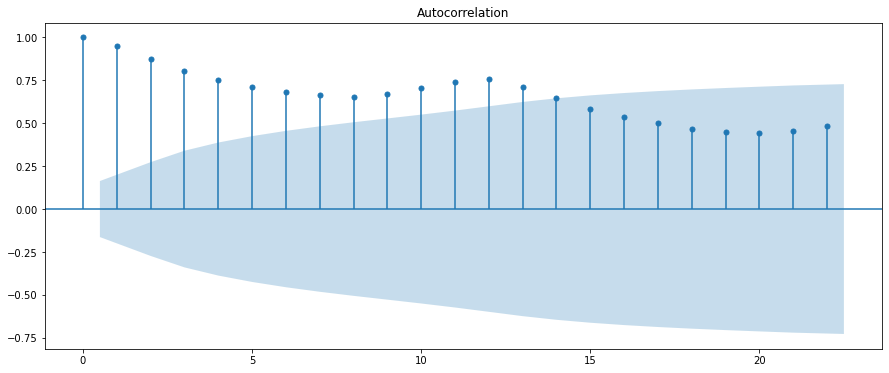

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plt.show()

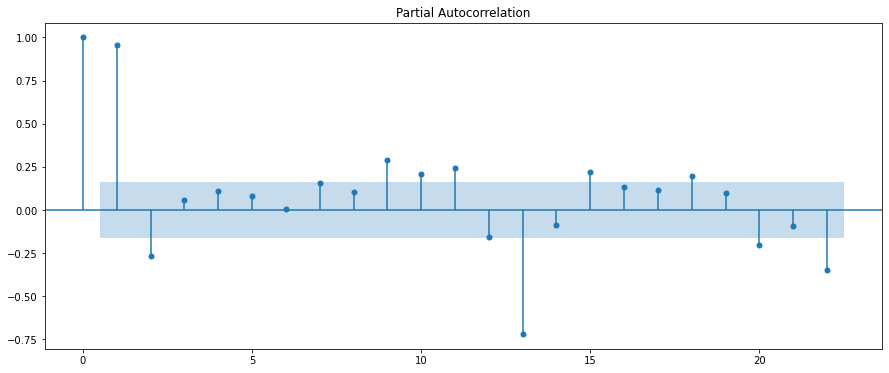

In [4]:
plot_pacf(data)
plt.show()

In [5]:
from statsmodels.tsa.arima_model import ARIMA

In [13]:
model = ARIMA(data, order=(5,1,0),missing="drop")
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -688.248
Method:                       css-mle   S.D. of innovations             29.720
Date:                Wed, 03 Nov 2021   AIC                           1390.495
Time:                        17:47:38   BIC                           1411.235
Sample:                    02-01-1949   HQIC                          1398.923
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6402      2.016      1.310      0.190      -1.311       6.592
ar.L1.D.#Passengers     0.3120      0.084      3.715      0.000       0.147       0.477
ar.L2.D.#Passeng

C:\Users\Fernando\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Fernando\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [7]:
from pandas import DataFrame

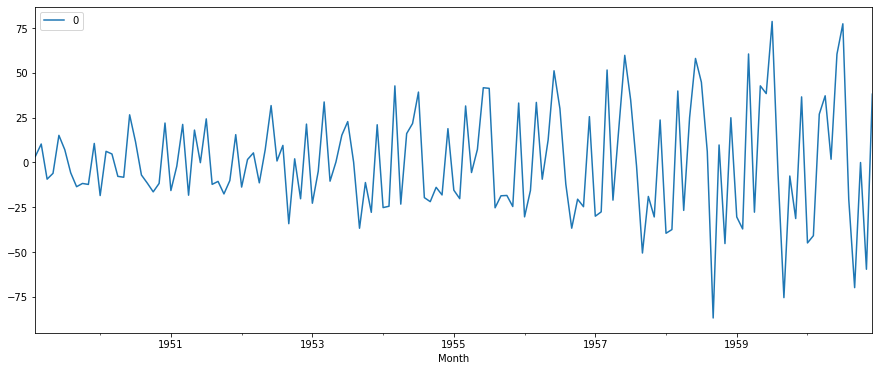

In [8]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

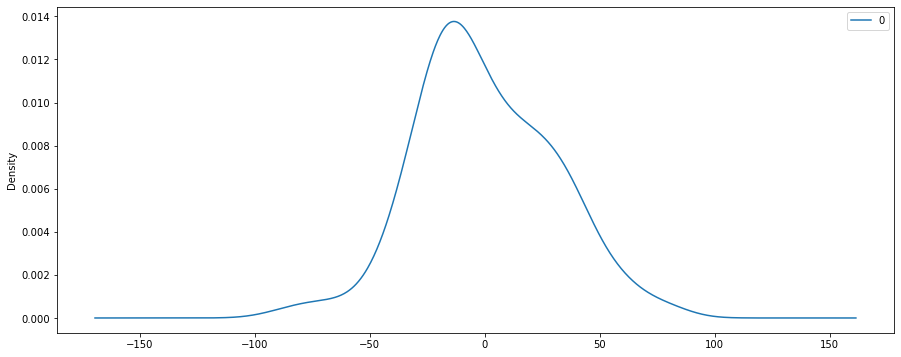

                0
count  143.000000
mean     0.010274
std     29.828333
min    -86.805583
25%    -19.916197
50%     -5.624253
75%     21.573874
max     78.697542


In [9]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [10]:
X = data.values

predicted=383.349044, expected=340.000000
predicted=351.781312, expected=318.000000
predicted=322.739347, expected=362.000000
predicted=372.884395, expected=348.000000
predicted=333.332452, expected=363.000000
predicted=382.493430, expected=435.000000
predicted=435.787791, expected=491.000000
predicted=502.006289, expected=505.000000
predicted=497.701953, expected=404.000000
predicted=347.130157, expected=359.000000
predicted=364.777294, expected=310.000000
predicted=307.297460, expected=337.000000
predicted=394.594997, expected=360.000000
predicted=377.731208, expected=342.000000
predicted=343.945935, expected=406.000000
predicted=419.247982, expected=396.000000
predicted=377.269087, expected=420.000000
predicted=433.784150, expected=472.000000
predicted=462.008942, expected=548.000000
predicted=569.727745, expected=559.000000
predicted=544.074814, expected=463.000000
predicted=418.350442, expected=407.000000
predicted=395.543448, expected=362.000000
predicted=369.154158, expected=405

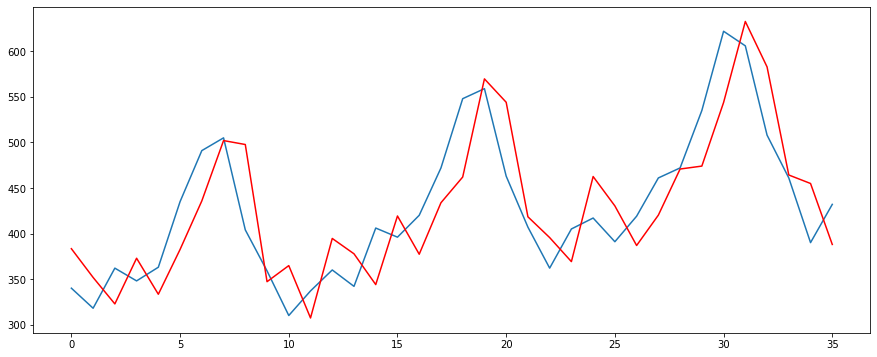

In [11]:
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()